In [106]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_swiss_roll # this give a 3d data sample that is in the sape of swiss roll. 

In [117]:
n_samples = 5000
data, _ = make_swiss_roll(n_samples)  # We generate a data that looks like a swiss rolle with n_samples number of data points. 
#TODO: What is its second parameter? 

(5000, 3)


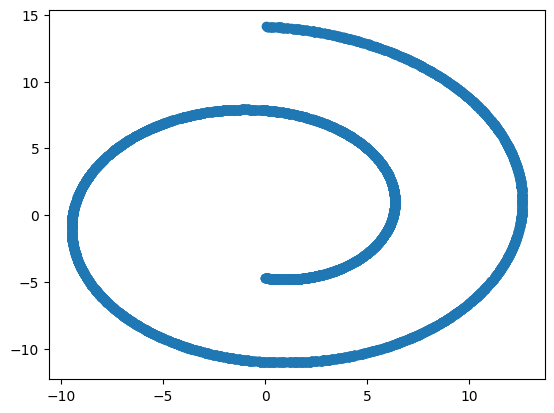

In [118]:
print(data.shape)
plt.scatter(data[:,0],data[:,2])

In [119]:
data = data[:,[2,0]]/10
data = data * np.array([1,-1])

(-2.0, 2.0)

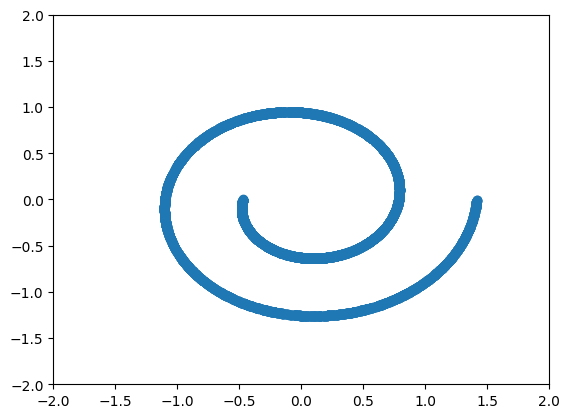

In [120]:
plt.scatter(data[:,0],data[:,1])
plt.xlim([-2,2])
plt.ylim([-2,2])

### Forward diffusion Kernel 

$$\mathcal{N}\left(x^{(t)},\underbrace{x^{(t-1)}\sqrt{1-\beta_t}}_{\text{mu}},\underbrace{I \beta_t}_{\text{std}} \right)$$


We are uisng the reparamatriztion tecnic

In [ ]:
class DiffusionModule():

    def __init__(self,T):
        self.beta = 

In [121]:
def forward_porcess(data,T,betas):

    for t in range(T):
        beta_t = betas[t]
        mu = data * torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)
        data = mu + torch.randn_like(data) * std

    return data


In [122]:

print(data.mean(0))
print(data.std(0))

[ 0.02688909 -0.19909323]
[0.69355035 0.66218762]


In [123]:
T = 100
betas = torch.sigmoid(torch.linspace(-18,10,T)) * (3e-1 - 1e-5) + 1e-5

xT = forward_porcess(torch.from_numpy(data),T,betas)

In [124]:
print(xT.mean(0))
print(xT.std(0))

tensor([-0.0138, -0.0258], dtype=torch.float64)
tensor([1.0075, 1.0238], dtype=torch.float64)


(-2.0, 2.0)

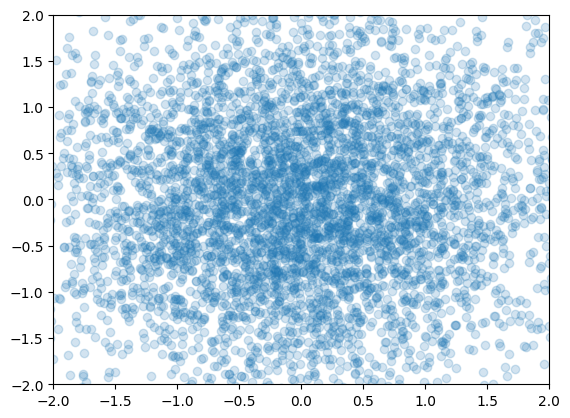

In [125]:
plt.scatter(xT[:,0].data.numpy(),xT[:,1].data.numpy(),alpha=0.2)
plt.xlim([-2,2])
plt.ylim([-2,2])